In [1]:
!pwd

/content


In [2]:
!mkdir imageclass

In [4]:
cd imageclass

/content/imageclass


In [3]:
from google.colab import files
upload = files.upload()

Saving imageclass.ipynb to imageclass.ipynb


In [16]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [5]:
import cv2
import imghdr

In [6]:
import tensorflow as tf
import os

In [7]:
data_dir = 'data' 

In [17]:
os.listdir(os.path.join(data_dir))

['happy', 'sad']

In [18]:
os.listdir(os.path.join(data_dir, 'happy'))

['getty_478389113_970647970450091_99776.jpg',
 'images34.jpg',
 'habits-of-happy-people-1.jpg',
 'how-happy-are-healthy-people.jpg',
 '2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg',
 'image31.png',
 'happypeople.jpg',
 'portrait-young-father-carrying-his-260nw-736997836.jpg',
 '0bdc9c3e1c945c699ebd8f4da98a7b62--off-camera-flash-happy-people.jpg',
 'image16.jpeg',
 'image14.jpeg',
 'A_Sep20_14_1189155141.jpg',
 '1902540.jpg',
 'images33.jpg',
 'o-HAPPY-facebook.jpg',
 'images4.jpg',
 'happy_people.jpg',
 'o-scandinavian-woman-posing-cheerful-together-on-brown-background-1891682716.jpg',
 'maxresdefault.jpg',
 'happy-people-14239094.jpg',
 '154006829.jpg',
 'essage-wears-yellow-clothing-people-modern-lifestyle-technology_273609-27928.jpg',
 'happy-woman-sunshine.jpg',
 'image2.jpeg',
 'images28.jpg',
 'images20.jpg',
 'happy-person-1024x768.jpeg',
 'tmp_6mv7xy_5d5b15258a507669_GettyImages-847741712.jpg',
 'images10.jpg',
 'image8.jpeg',
 'pexels-photo-3019836.jp

In [33]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [34]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [35]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

getty_478389113_970647970450091_99776.jpg
images34.jpg
habits-of-happy-people-1.jpg
how-happy-are-healthy-people.jpg
2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg
image31.png
happypeople.jpg
portrait-young-father-carrying-his-260nw-736997836.jpg
0bdc9c3e1c945c699ebd8f4da98a7b62--off-camera-flash-happy-people.jpg
image16.jpeg
image14.jpeg
A_Sep20_14_1189155141.jpg
1902540.jpg
images33.jpg
o-HAPPY-facebook.jpg
images4.jpg
happy_people.jpg
o-scandinavian-woman-posing-cheerful-together-on-brown-background-1891682716.jpg
maxresdefault.jpg
happy-people-14239094.jpg
154006829.jpg
essage-wears-yellow-clothing-people-modern-lifestyle-technology_273609-27928.jpg
happy-woman-sunshine.jpg
image2.jpeg
images28.jpg
images20.jpg
happy-person-1024x768.jpeg
tmp_6mv7xy_5d5b15258a507669_GettyImages-847741712.jpg
images10.jpg
image8.jpeg
pexels-photo-3019836.jpeg
how-to-be-happy.jpg
getty_152414899_97046097045006_68075.jpg
images19.jpg
image21.jpeg
Overtly-Cheerful-Primer-Editoria

In [36]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Image not in ext list data/happy/portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in ext list data/happy/essage-wears-yellow-clothing-people-modern-lifestyle-technology_273609-27928.jpg
Image not in ext list data/happy/126573019-group-of-happy-hiker-jumping-on-the-hill-hiking-holiday-wild-adventure.jpg
Image not in ext list data/happy/happiness_thumbnail.jpg
Image not in ext list data/happy/427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data/happy/2560px-Happy_People.jpg
Image not in ext list data/happy/young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in ext list data/happy/Happy_guy.jpg
Image not in ext list data/happy/young-woman-wearing-casual-clothes-260nw-1917338345.jpg
Image not in ext list data/sad/sad-girl-park-cartoon-color-260nw-1026254521.jpg
Image not in ext list data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list data/sad/39843138-sad-man.jpg
Image not in ext list data/sad/1800x1200_

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [37]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 300 files belonging to 2 classes.


In [38]:
data_iterator = data.as_numpy_iterator()

In [39]:
data_iterator

In [40]:
batch = data_iterator.next()

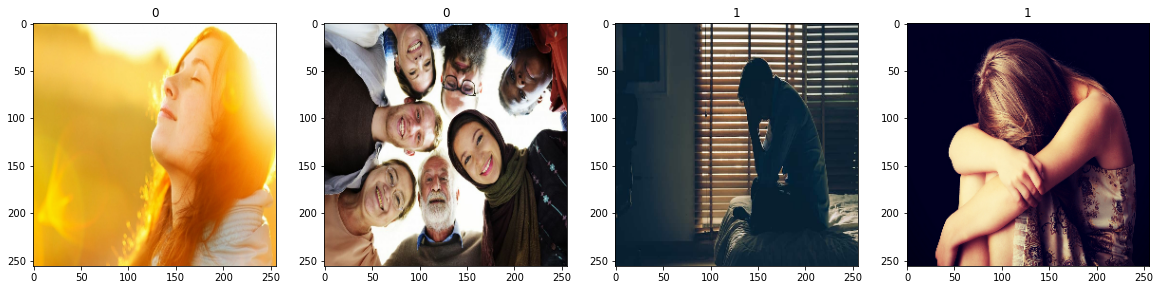

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [42]:
data = data.map(lambda x,y: (x/255, y))

In [43]:
data.as_numpy_iterator().next()

(array([[[[4.07475512e-03, 2.36825980e-02, 0.00000000e+00],
          [1.61458328e-02, 3.62132341e-02, 6.92401966e-03],
          [3.52941193e-02, 5.88235296e-02, 1.17647061e-02],
          ...,
          [3.52941193e-02, 1.09803922e-01, 3.52941193e-02],
          [3.57536748e-02, 9.06556398e-02, 2.39889715e-02],
          [2.35294122e-02, 7.05882385e-02, 1.56862754e-02]],
 
         [[4.07475512e-03, 2.36825980e-02, 0.00000000e+00],
          [1.61458328e-02, 3.62132341e-02, 6.92401966e-03],
          [3.52941193e-02, 5.88235296e-02, 1.17647061e-02],
          ...,
          [2.74509806e-02, 1.01960786e-01, 2.74509806e-02],
          [3.57536748e-02, 9.06556398e-02, 2.39889715e-02],
          [2.35294122e-02, 7.05882385e-02, 1.56862754e-02]],
 
         [[0.00000000e+00, 1.96078438e-02, 0.00000000e+00],
          [9.67778265e-03, 2.97451839e-02, 3.59030332e-06],
          [3.52941193e-02, 5.88235296e-02, 1.18259806e-02],
          ...,
          [4.70588244e-02, 1.01960786e-01, 3.5294

In [44]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [45]:
train_size

7

In [46]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [47]:
train


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [49]:
model = Sequential()

In [50]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [53]:
logdir='logs'

In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [55]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 19s 2s/step - loss: 0.6611 - accuracy: 0.6116 - val_loss: 0.6186 - val_accuracy: 0.6562
Epoch 2/20
7/7 [==============================] - 18s 2s/step - loss: 0.6194 - accuracy: 0.6562 - val_loss: 0.6220 - val_accuracy: 0.5312
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 0.5102 - accuracy: 0.7411 - val_loss: 0.4508 - val_accuracy: 0.8438
Epoch 4/20
7/7 [==============================] - 18s 2s/step - loss: 0.4794 - accuracy: 0.7857 - val_loss: 0.3504 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 16s 2s/step - loss: 0.3529 - accuracy: 0.8259 - val_loss: 0.4231 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 16s 2s/step - loss: 0.3390 - accuracy: 0.8616 - val_loss: 0.2618 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 16s 2s/step - loss: 0.2746 - accuracy: 0.8929 - val_loss: 0.1643 - val_accuracy: 0.9219
Epoch 8/20
7/7 [==================

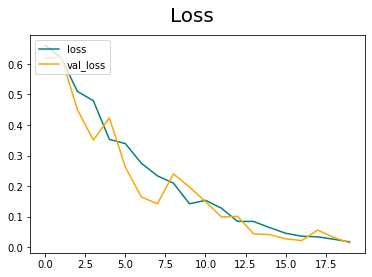

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

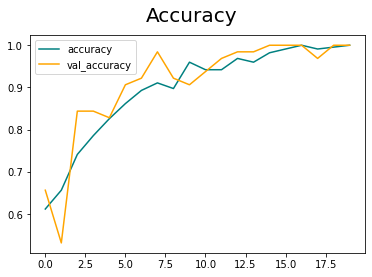

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [59]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [60]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [61]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## 10. **Test**

In [62]:
import cv2

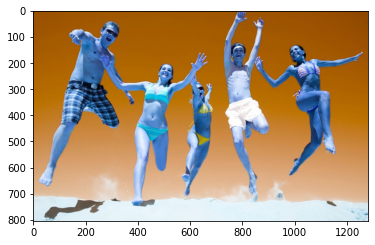

In [65]:
img = cv2.imread('/content/imageclass/data/happy/1902540.jpg')
plt.imshow(img)
plt.show()

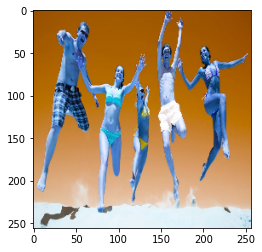

In [66]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [68]:
yhat

array([[9.5355885e-05]], dtype=float32)

In [69]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
